# **🏠 부동산 실거래가 EDA Report**


## Contents
1. 데이터 개요
2. 결측치 탐색
3. 변수 타입과 분포
4. 주요 변수 간 관계
5. 이상치 탐색
6. 요약 및 인사이트

In [10]:
# 필요한 utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 3. csv 파일 불러오기
DATA_PATH = "/data/ephemeral/home/workspace/upstageailab-ml-competition-ml-2/1.Data/"
train_df = pd.read_csv(DATA_PATH + "train.csv")
test_df = pd.read_csv(DATA_PATH + "test.csv")

subway_df = pd.read_csv(DATA_PATH + "subway_feature.csv")
bus_df = pd.read_csv(DATA_PATH + "bus_feature.csv")

# train 데이터와 test 데이터 하나로 합치기! 
train_df['is_train'] = 1
test_df['is_train'] = 0
all_df = pd.concat([train_df, test_df], ignore_index= True)

/tmp/ipykernel_645637/1339167722.py:17: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(DATA_PATH + "train.csv")


In [ ]:
# 1️⃣ 데이터 개요   1.2 데이터 건수 및 컬럼 수 확인
display(train_df.shape, test_df.shape)
display(subway_df.shape, bus_df.shape)


# 1️⃣ 데이터 개요

## 1.1 파일 설명
- train.csv : 학습 데이터 (거래 정보 + 거래금액)
- test.csv : 예측 대상 데이터
- subway.csv : 서울시 지하철역 정보
- bus.csv : 서울시 버스정류장 정보

---

## 1.2 데이터 건수 및 컬럼 수
- train.csv : 1,118,822건 × 53컬럼
- test.csv : 9,272건 × 52컬럼
- subway.csv : 768건 × 5컬럼
- bus.csv : 12,584건 x 6컬럼

---

## 1.3 Target 변수
- 거래금액 : 예측 대상 (만원 단위)

In [ ]:
# 2.1 결측치 개수와 비율
missing_count = all_df.isnull().sum()
missing_percent = (missing_count / len(all_df)) * 100
missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent.round(2)
})
missing_table = missing_table[missing_table['Missing Count'] > 0]
missing_table.sort_values('Missing %',ascending=False)

# 2️⃣ 결측치 탐색

## 2.1 결측치 개수 및 비율
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Missing Count</th>
      <th>Missing %</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>k-135㎡초과</th>
      <td>1127765</td>
      <td>99.97</td>
    </tr>
    <tr>
      <th>해제사유발생일</th>
      <td>1121899</td>
      <td>99.45</td>
    </tr>
    <tr>
      <th>k-등록일자</th>
      <td>1116386</td>
      <td>98.96</td>
    </tr>
    <tr>
      <th>단지소개기존clob</th>
      <td>1058958</td>
      <td>93.87</td>
    </tr>
    <tr>
      <th>k-홈페이지</th>
      <td>1013523</td>
      <td>89.84</td>
    </tr>
    <tr>
      <th>고용보험관리번호</th>
      <td>920757</td>
      <td>81.62</td>
    </tr>
    <tr>
      <th>세대전기계약방법</th>
      <td>885389</td>
      <td>78.49</td>
    </tr>
    <tr>
      <th>k-팩스번호</th>
      <td>879348</td>
      <td>77.95</td>
    </tr>
    <tr>
      <th>k-시행사</th>
      <td>877834</td>
      <td>77.82</td>
    </tr>
    <tr>
      <th>청소비관리형태</th>
      <td>877751</td>
      <td>77.81</td>
    </tr>
    <tr>
      <th>k-건설사(시공사)</th>
      <td>877637</td>
      <td>77.80</td>
    </tr>
    <tr>
      <th>경비비관리형태</th>
      <td>877561</td>
      <td>77.79</td>
    </tr>
    <tr>
      <th>k-단지분류(아파트,주상복합등등)</th>
      <td>877273</td>
      <td>77.77</td>
    </tr>
    <tr>
      <th>k-전체동수</th>
      <td>877207</td>
      <td>77.76</td>
    </tr>
    <tr>
      <th>k-전화번호</th>
      <td>876850</td>
      <td>77.73</td>
    </tr>
    <tr>
      <th>단지승인일</th>
      <td>876854</td>
      <td>77.73</td>
    </tr>
    <tr>
      <th>k-복도유형</th>
      <td>876454</td>
      <td>77.69</td>
    </tr>
    <tr>
      <th>건축면적</th>
      <td>876279</td>
      <td>77.68</td>
    </tr>
    <tr>
      <th>k-사용검사일-사용승인일</th>
      <td>876259</td>
      <td>77.68</td>
    </tr>
    <tr>
      <th>주차대수</th>
      <td>876277</td>
      <td>77.68</td>
    </tr>
    <tr>
      <th>k-주거전용면적</th>
      <td>876170</td>
      <td>77.67</td>
    </tr>
    <tr>
      <th>좌표X</th>
      <td>876232</td>
      <td>77.67</td>
    </tr>
    <tr>
      <th>k-전용면적별세대현황(60㎡~85㎡이하)</th>
      <td>876170</td>
      <td>77.67</td>
    </tr>
    <tr>
      <th>k-85㎡~135㎡이하</th>
      <td>876170</td>
      <td>77.67</td>
    </tr>
    <tr>
      <th>좌표Y</th>
      <td>876232</td>
      <td>77.67</td>
    </tr>
    <tr>
      <th>단지신청일</th>
      <td>876187</td>
      <td>77.67</td>
    </tr>
    <tr>
      <th>k-수정일자</th>
      <td>876170</td>
      <td>77.67</td>
    </tr>
    <tr>
      <th>k-전용면적별세대현황(60㎡이하)</th>
      <td>876170</td>
      <td>77.67</td>
    </tr>
    <tr>
      <th>기타/의무/임대/임의=1/2/3/4</th>
      <td>876125</td>
      <td>77.66</td>
    </tr>
    <tr>
      <th>k-연면적</th>
      <td>876125</td>
      <td>77.66</td>
    </tr>
    <tr>
      <th>k-관리비부과면적</th>
      <td>876125</td>
      <td>77.66</td>
    </tr>
    <tr>
      <th>관리비 업로드</th>
      <td>876125</td>
      <td>77.66</td>
    </tr>
    <tr>
      <th>k-전체세대수</th>
      <td>876125</td>
      <td>77.66</td>
    </tr>
    <tr>
      <th>k-난방방식</th>
      <td>876125</td>
      <td>77.66</td>
    </tr>
    <tr>
      <th>k-관리방식</th>
      <td>876125</td>
      <td>77.66</td>
    </tr>
    <tr>
      <th>k-세대타입(분양형태)</th>
      <td>876125</td>
      <td>77.66</td>
    </tr>
    <tr>
      <th>사용허가여부</th>
      <td>876125</td>
      <td>77.66</td>
    </tr>
    <tr>
      <th>target</th>
      <td>9272</td>
      <td>0.82</td>
    </tr>
    <tr>
      <th>아파트명</th>
      <td>2136</td>
      <td>0.19</td>
    </tr>
    <tr>
      <th>번지</th>
      <td>227</td>
      <td>0.02</td>
    </tr>
    <tr>
      <th>본번</th>
      <td>75</td>
      <td>0.01</td>
    </tr>
    <tr>
      <th>부번</th>
      <td>75</td>
      <td>0.01</td>
    </tr>
  </tbody>
</table>
</div>

---

## 2.2 인사이트
- 결측치 비율이 높아서, 삭제할 결측치 비율 선정이 필요함!
- 결측치 대체 전략 : 범주형(Null), 연속형(Linear)


In [ ]:
all_df.dtypes

수치형 
 ['전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '해제사유발생일', '단지소개기존clob', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'is_train']
범주형 
 ['시군구', '번지', '본번', '부번', '아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']


/tmp/ipykernel_645637/499004192.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


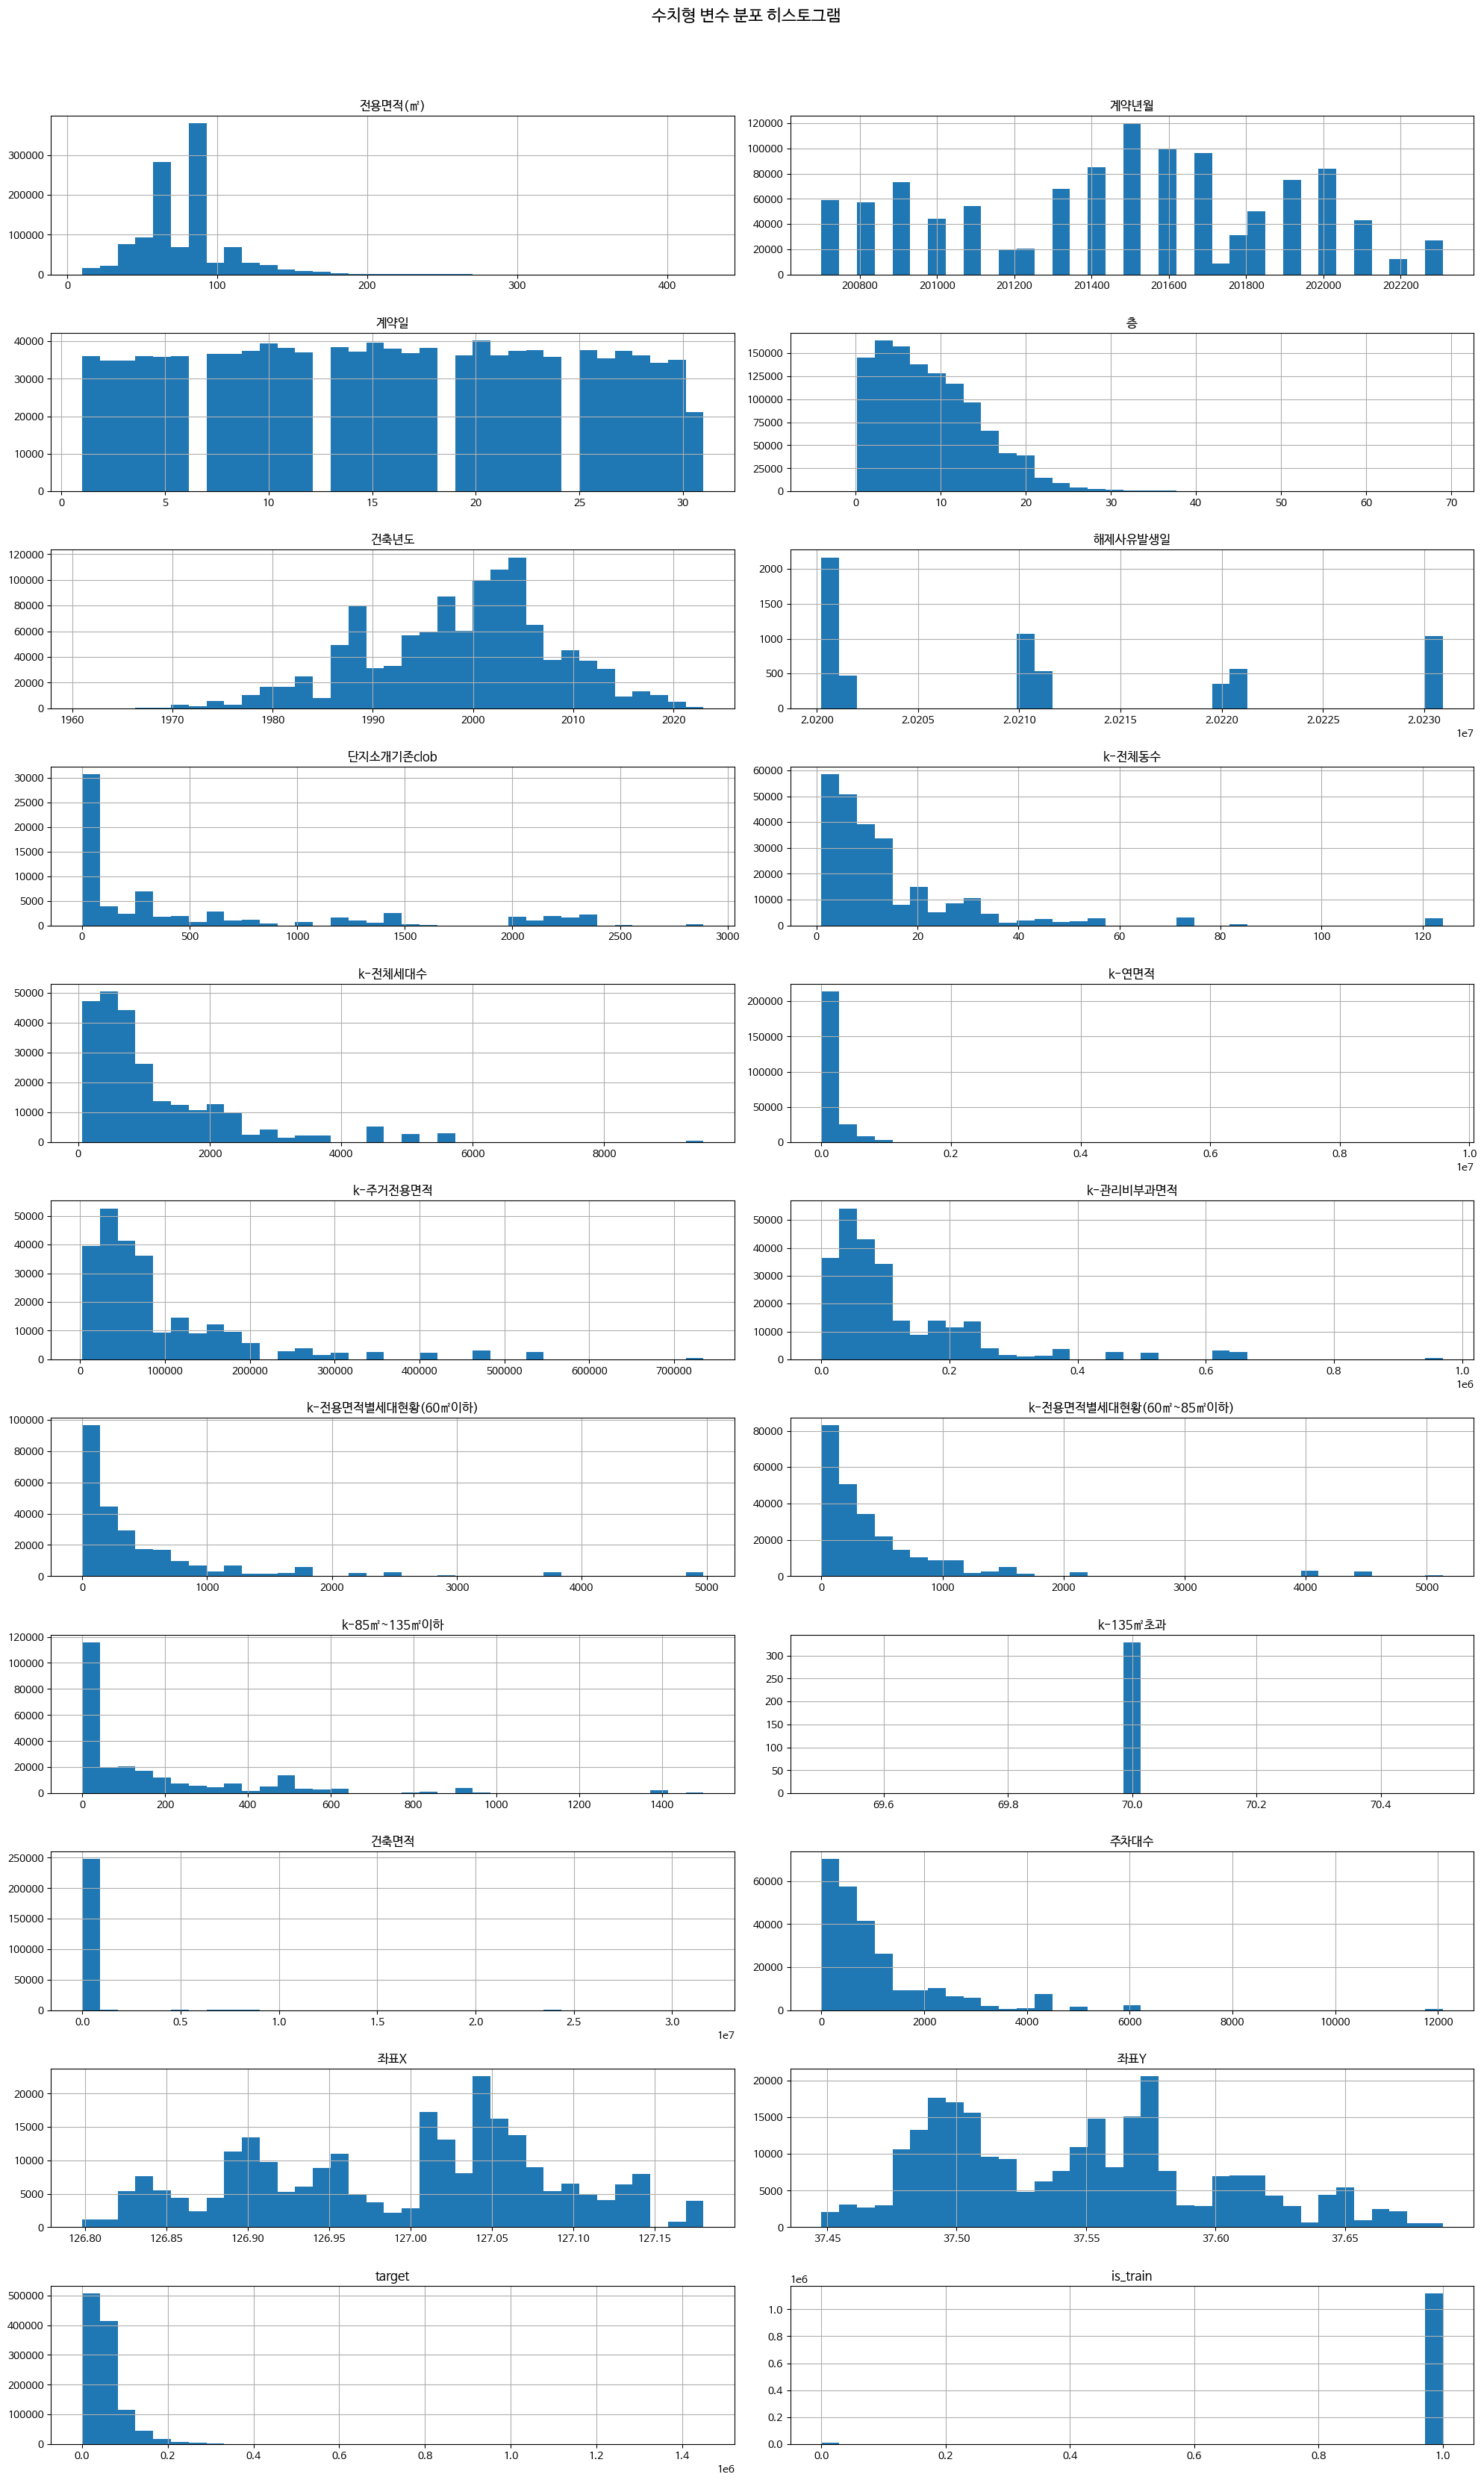

In [35]:
# 연속형 범주와 범주형 변수 나눠 분포 알아보기

all_df['본번'] = all_df['본번'].astype('str')
all_df['부번'] = all_df['부번'].astype('str')

continuous_columns=[]
categorical_columns=[]

for col in all_df.columns:
  if pd.api.types.is_numeric_dtype(all_df[col]):
    continuous_columns.append(col)
  else:
    categorical_columns.append(col)

print("수치형 \n", continuous_columns)
print("범주형 \n", categorical_columns)

ax = all_df[continuous_columns].hist(bins=35, figsize=(20, 35), layout=(len(continuous_columns) // 2 + 1, 2))
plt.suptitle('📊 수치형 변수 분포 히스토그램', fontsize=16, y=1.02)  
plt.tight_layout()
plt.show()


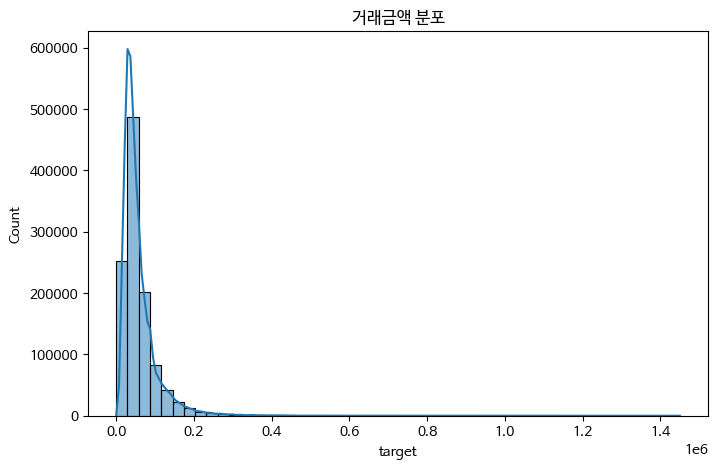

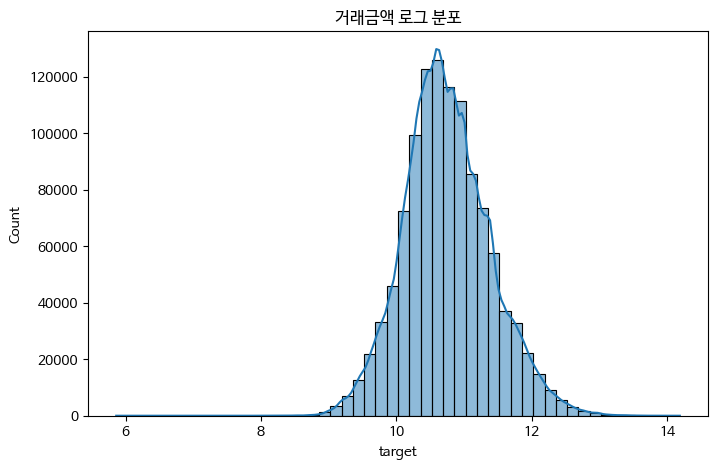

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['target'], bins=50, kde=True)
plt.title('거래금액 분포')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(train_df['target']), bins=50, kde=True)
plt.title('거래금액 로그 분포')
plt.show()

# 3️⃣ 변수 타입과 분포

## 3.1 변수 타입
### ✅ 수치형 변수 (continuous_columns)
- 전용면적(㎡)
- 계약년월
- 계약일
- 층
- 건축년도
- 해제사유발생일
- 단지소개기존clob
- k-전체동수
- k-전체세대수
- k-연면적
- k-주거전용면적
- k-관리비부과면적
- k-전용면적별세대현황(60㎡이하)
- k-전용면적별세대현황(60㎡~85㎡이하)
- k-85㎡~135㎡이하
- k-135㎡초과
- 건축면적
- 주차대수
- 좌표X
- 좌표Y
- target
- is_train

---

### ✅ 범주형 변수 (categorical_columns)
- 시군구
- 번지
- 본번
- 부번
- 아파트명
- 도로명
- 등기신청일자
- 거래유형
- 중개사소재지
- k-단지분류(아파트,주상복합등등)
- k-전화번호
- k-팩스번호
- k-세대타입(분양형태)
- k-관리방식
- k-복도유형
- k-난방방식
- k-건설사(시공사)
- k-시행사
- k-사용검사일-사용승인일
- k-홈페이지
- k-등록일자
- k-수정일자
- 고용보험관리번호
- 경비비관리형태
- 세대전기계약방법
- 청소비관리형태
- 기타/의무/임대/임의=1/2/3/4
- 단지승인일
- 사용허가여부
- 관리비 업로드
- 단지신청일

---

## 3.2 수치형 변수 분포
- 전용면적 : 오른쪽 꼬리 → 중앙 근처 인기 평형대에 몰려 있고, 오른쪽 끝(200㎡ 이상)은 거의 없다.
- target(금액) : 오른쪽 꼬리 → 로그 변환 고려

---

## 3.3 거래금액 분포
- 로그 변환 후 분포가 더 정규분포 형태
- 모델 학습에서 로그스케일 적용 고려

---

## 3.4 범주형 변수 분포
- 전체 카테고리가 너무 많아 단일 시각화가 어려움


전용면적(㎡)                   0.577041
주차대수                      0.348141
계약년월                      0.344665
k-연면적                     0.343594
k-주거전용면적                  0.334076
k-관리비부과면적                 0.316773
좌표Y                      -0.312180
k-85㎡~135㎡이하              0.257145
k-전체동수                    0.234470
k-전용면적별세대현황(60㎡~85㎡이하)    0.229618
Name: target, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


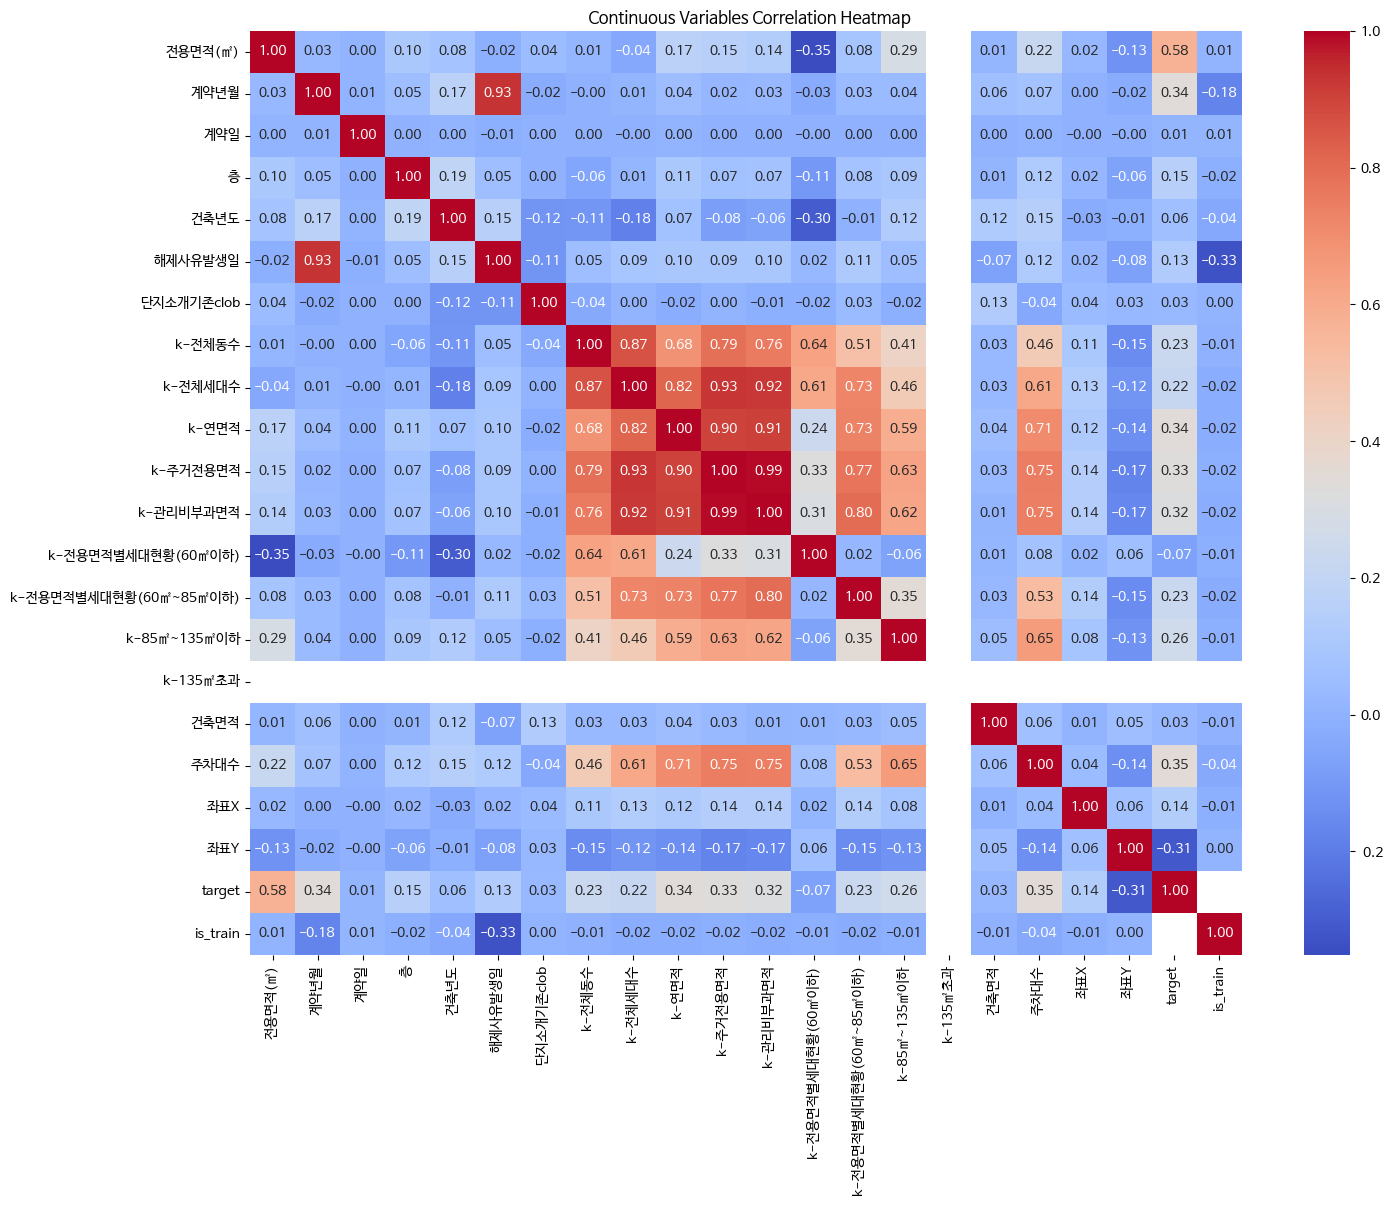

In [47]:
# 상관계수 계산
corr_matrix = all_df[continuous_columns].corr()


target_corr = corr_matrix['target'].drop('target')
top10_features = target_corr.abs().sort_values(ascending=False).head(10).index
top10_with_sign = target_corr.loc[top10_features]
print(top10_with_sign)


# 히트맵
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('📌 Continuous Variables Correlation Heatmap')
plt.show()

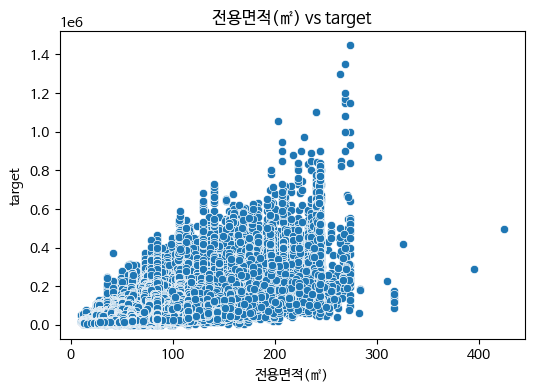

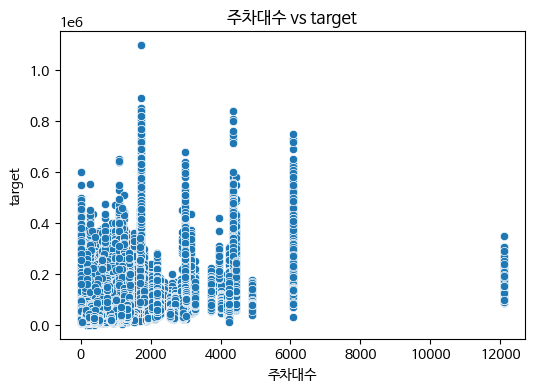

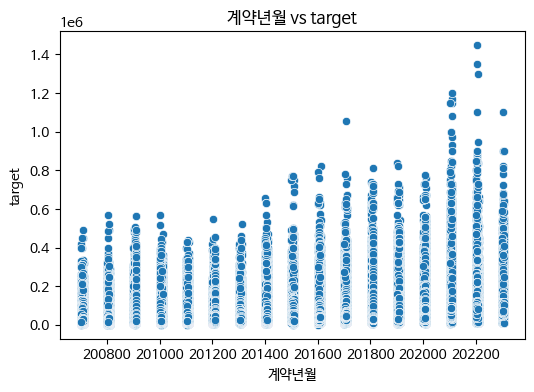

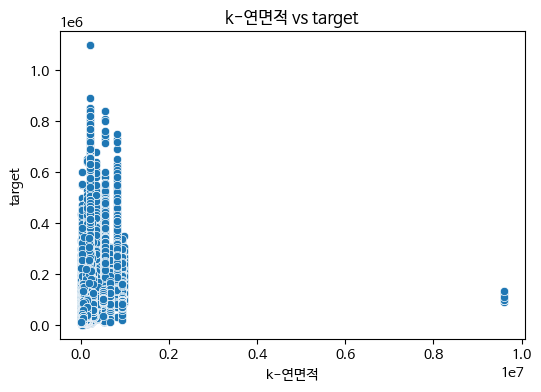

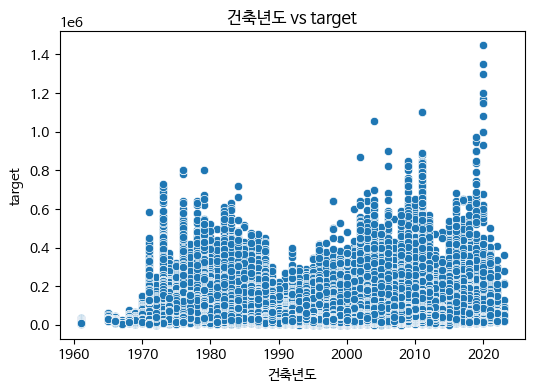

In [48]:
key_features = ['전용면적(㎡)', '주차대수', '계약년월', 'k-연면적' ,'건축년도']

for col in key_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='target', data=all_df)
    plt.title(f'{col} vs target')
    plt.show()

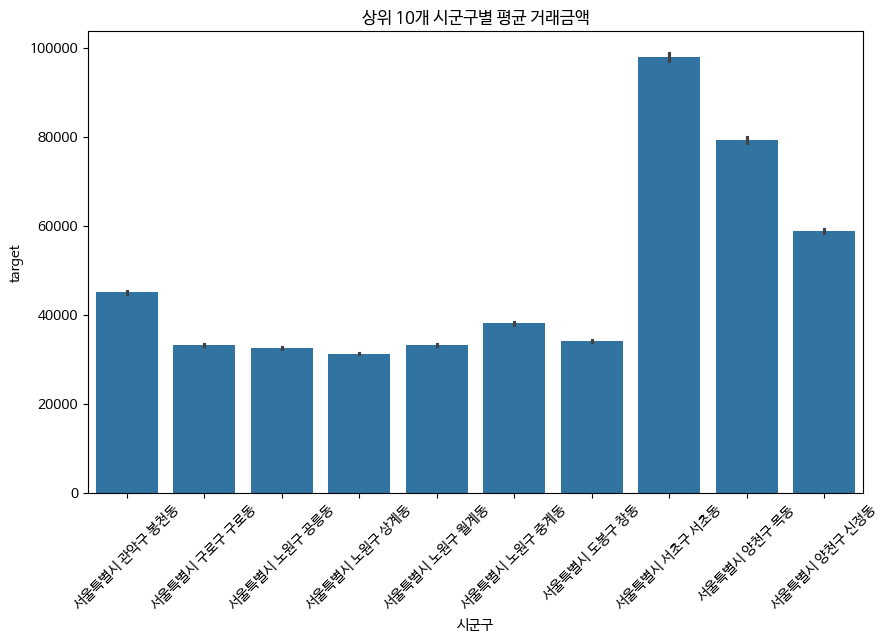

In [50]:
plt.figure(figsize=(10,6))
top_sigungus = all_df['시군구'].value_counts().nlargest(10).index
sns.barplot(data=all_df[all_df['시군구'].isin(top_sigungus)],
            x='시군구', y='target')
plt.xticks(rotation=45)
plt.title('상위 10개 시군구별 평균 거래금액')
plt.show()


# 4️⃣ 주요 변수 간 관계

## 4.1 상관계수 히트맵
- 수치형 변수 간 상관관계 시각화
- target과 상관 높은 변수 파악
- 다중공선성 탐색

---

## 4.2 주요 변수 vs target 산점도
- 전용면적(㎡) vs target → 가격 증가 경향
- 주차대수 vs target → 주차 대수가 클수록 단지 규모가 큼 → 가격 상승 요인
- 건축년도 vs target → 신규 단지 프리미엄 여부? 최근 건축일수록 가격이 높은 경향 보임


---

## 4.3 범주형 변수별 타겟 평균
- 상위 10개 시군구별 평균 거래금액 → 지역적 가격 차이 (서울특별시 서초구 서초동, 양천구 목동은 평균 거래금액이 압도적으로 높음)
- 지역적인 입지 특성이 거래 금액을 크게 좌우하는 것으로 보임 → 지역적 특성을 파생변수로 적극 활용할 필요!!


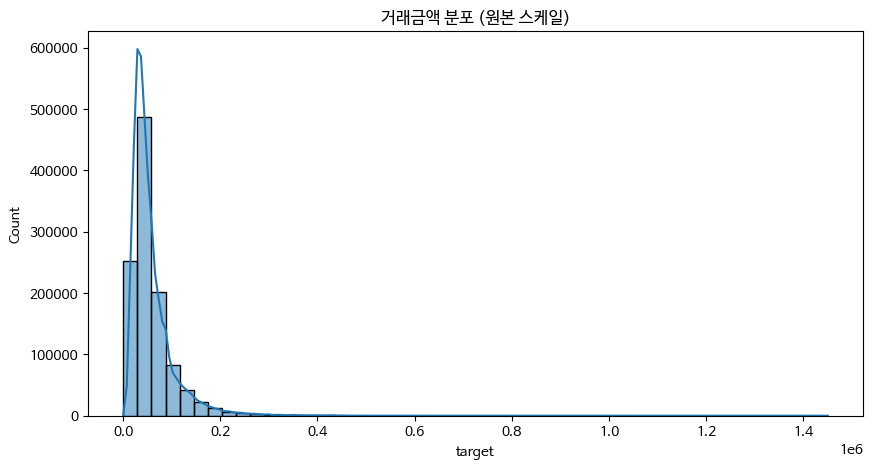

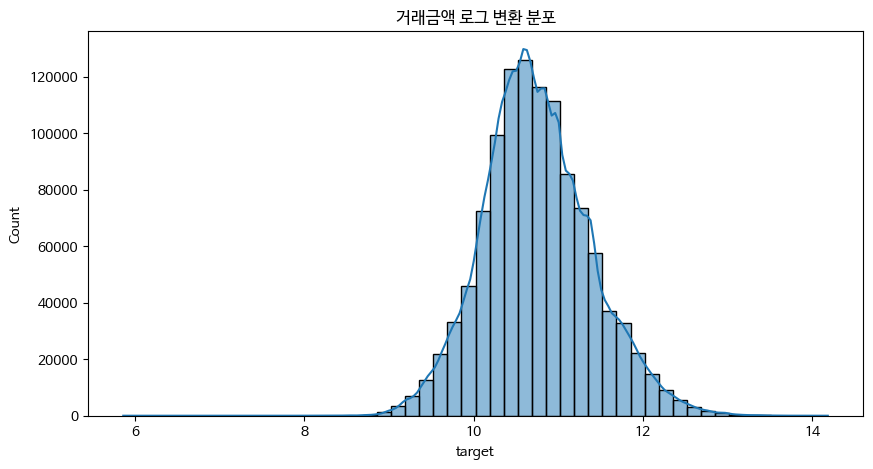

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(train_df['target'], bins=50, kde=True)
plt.title('거래금액 분포 (원본 스케일)')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(np.log1p(train_df['target']), bins=50, kde=True)
plt.title('거래금액 로그 변환 분포')
plt.show()

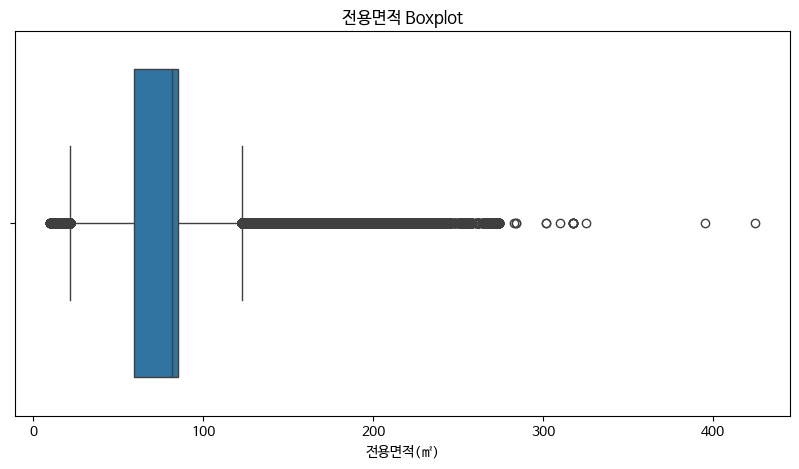

count    1.128094e+06
mean     7.716028e+01
std      2.936448e+01
min      1.002000e+01
25%      5.965000e+01
50%      8.187000e+01
75%      8.496000e+01
max      4.243200e+02
Name: 전용면적(㎡), dtype: float64

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x=all_df['전용면적(㎡)'])
plt.title('전용면적 Boxplot')
plt.show()

# 상위 극단값 확인
all_df['전용면적(㎡)'].describe()


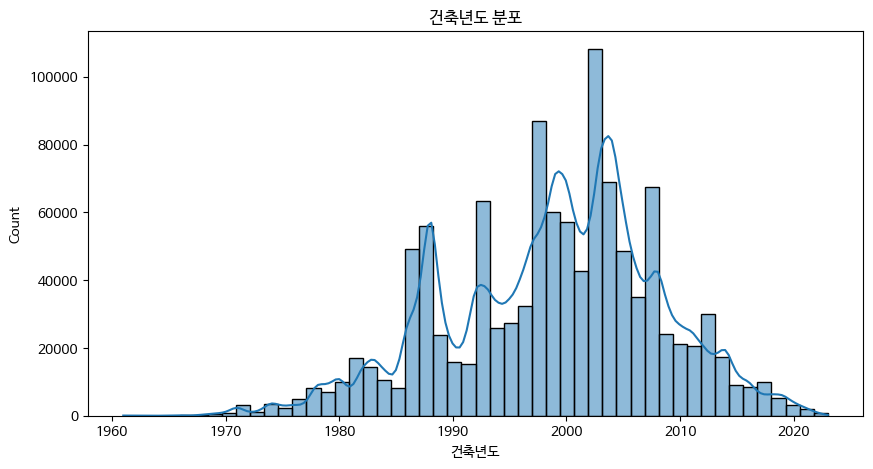

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_train


In [56]:
plt.figure(figsize=(10,5))
sns.histplot(all_df['건축년도'].dropna(), bins=50, kde=True)
plt.title('건축년도 분포')
plt.show()

# 이상값 확인
all_df[all_df['건축년도'] < 1900]
all_df[all_df['건축년도'] > 2025]


# 5️⃣ 이상치 탐색

## 5.1 거래금액
- 오른쪽 꼬리가 긴 분포
- 로그 변환 후 분포 안정화
- 추후 모델링 시 로그 변환한 target 사용!

---

## 5.2 전용면적(㎡) 이상치
- Boxplot으로 극단값 확인
- 200㎡ 초과 거래 희귀 → 제거 혹은 클리핑 고려

---



# 6️⃣ 요약 및 인사이트

## 6.1 데이터 특징
- 서울 아파트 거래 실거래가 데이터로 110만 건 이상 방대한 규모
- 수치형/범주형 컬럼 다양, 단지정보 및 좌표 정보까지 포함
- 지하철, 버스 등의 추가 외부 데이터 결합 가능

---

## 6.2 결측치
- 특정 변수의 결측치가 70~99% 이상 매우 높음
- 삭제 기준(임계 비율) 선정이 필요
- 결측치 대체 전략:
  - 범주형 변수: 'Null'로 대체
  - 수치형 변수: 평균/중앙값/선형회귀 기반 대체 고려

---

## 6.3 변수 분포
- 거래금액(target) → 오른쪽 긴 꼬리 → 로그 변환 후 정규분포 형태
- 전용면적(㎡) → 중앙 근처 인기 평형대 밀집 + 일부 극단값 존재
- 범주형 변수 → 매우 많은 고카디널리티 (시군구, 아파트명 등) → 인코딩 전략 필요

---

## 6.4 변수 간 관계
- 전용면적, 주차대수, 건축년도 등 → target과 양의 상관관계
- 신규 단지 프리미엄 효과(최근 건축년도일수록 가격이 높은 경향)
- 시군구별 평균 가격 큰 차이 → 지역적 입지가 가격을 결정짓는 주요 요인
- 지역적 특성 파생변수 설계 필요 (Target Encoding 등)

---

## 6.5 이상치 탐색
- 거래금액 상위 이상치(오른쪽 긴 꼬리) → 로그 변환으로 스케일 안정화
- 전용면적 200㎡ 초과 극단값 → 제거/클리핑 필요

---

## 6.6 Feature Engineering 아이디어 스케치
- 거래금액 로그 변환 → 모델 학습 안정화
- 전용면적(㎡) 이상치 제거/클리핑
- 위도/경도 → 클러스터링 or 거리 기반 피처 설계 
- 계약년월 → 연/월 분리, 시계열 특성 피처 생성
- 시군구 등 고카디널리티 범주형 변수 → Target Encoding
- 외부 데이터(지하철, 버스) 결합 → 주변 교통 접근성 변수 추가 가능


